In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.util import ngrams
import nltk.corpus
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('cleaned_data.csv',index_col=None)

In [3]:
df.isnull().sum()

title        0
text       631
subject      0
date         0
label        0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [6]:
df.head()

,title,text,subject,date,label
0,as us budget fight loom republicans flip fisc...,washington reuters the head conservative re...,politicsnews,"December 31, 2017",TRUE
1,us military accept transgender recruit monday ...,washington reuters transgender people allow...,politicsnews,"December 29, 2017",TRUE
2,senior us republican senator let mr mueller job,washington reuters the special counsel inve...,politicsnews,"December 31, 2017",TRUE
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser g...,politicsnews,"December 30, 2017",TRUE
4,trump want postal service charge much amazon ...,seattlewashington reuters president donald ...,politicsnews,"December 29, 2017",TRUE


In [7]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 1000,
        height = 500,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

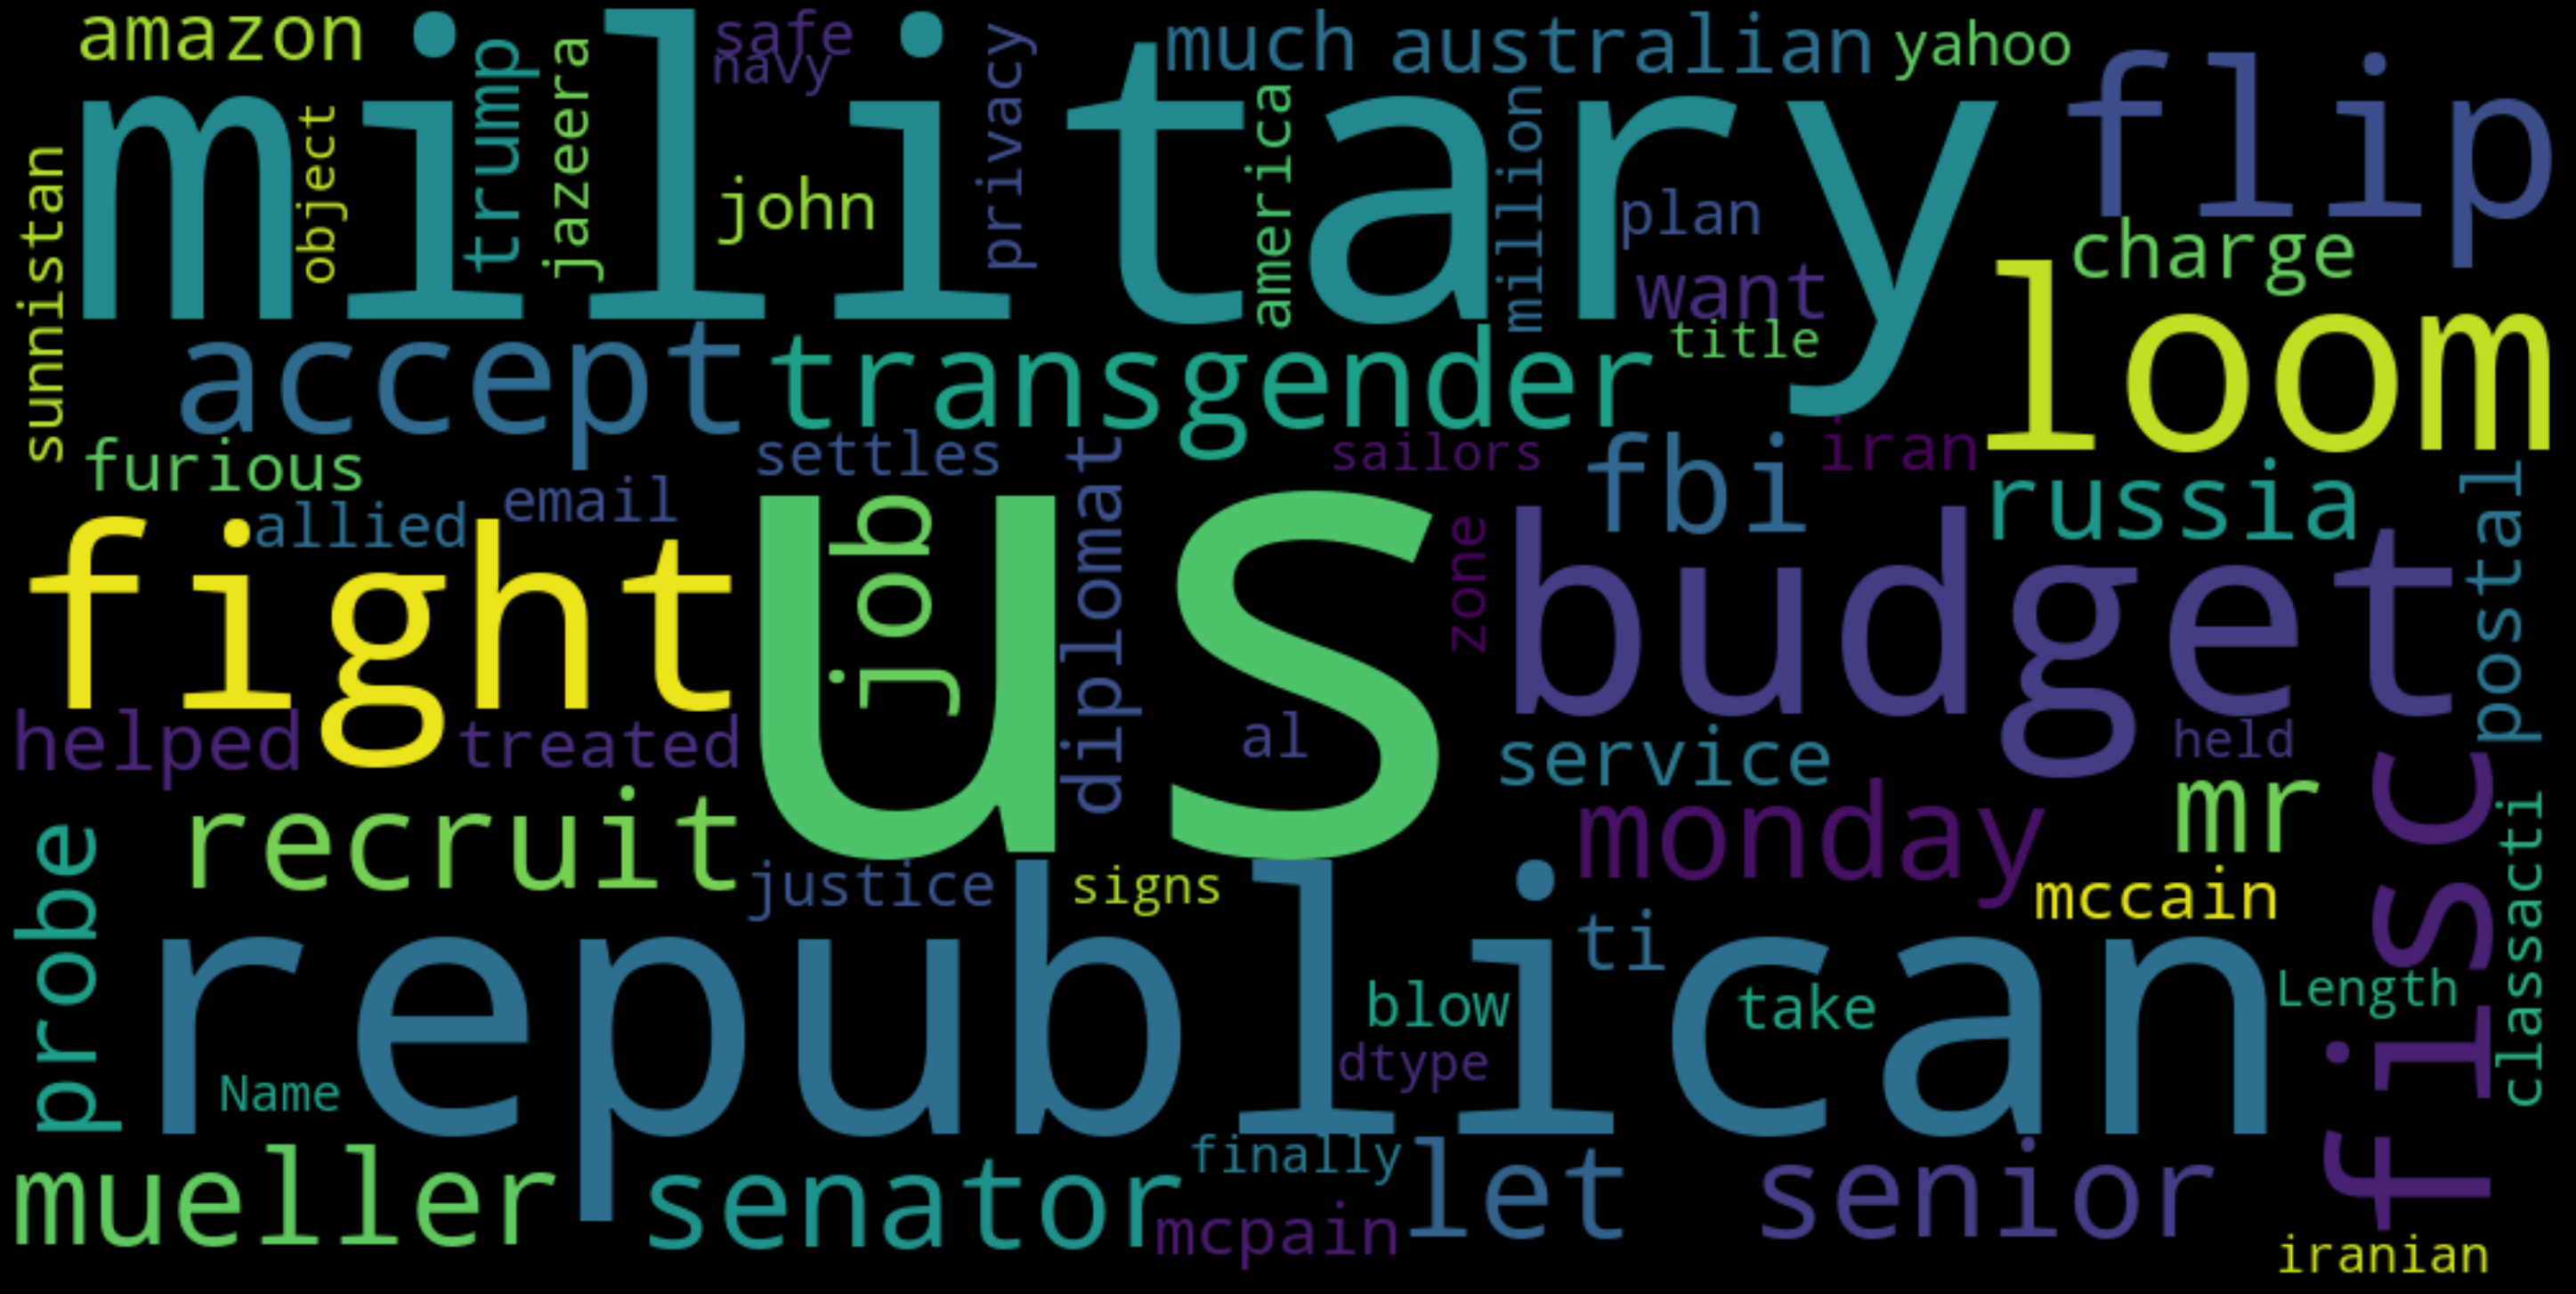

In [8]:
generate_word_cloud(df.title)

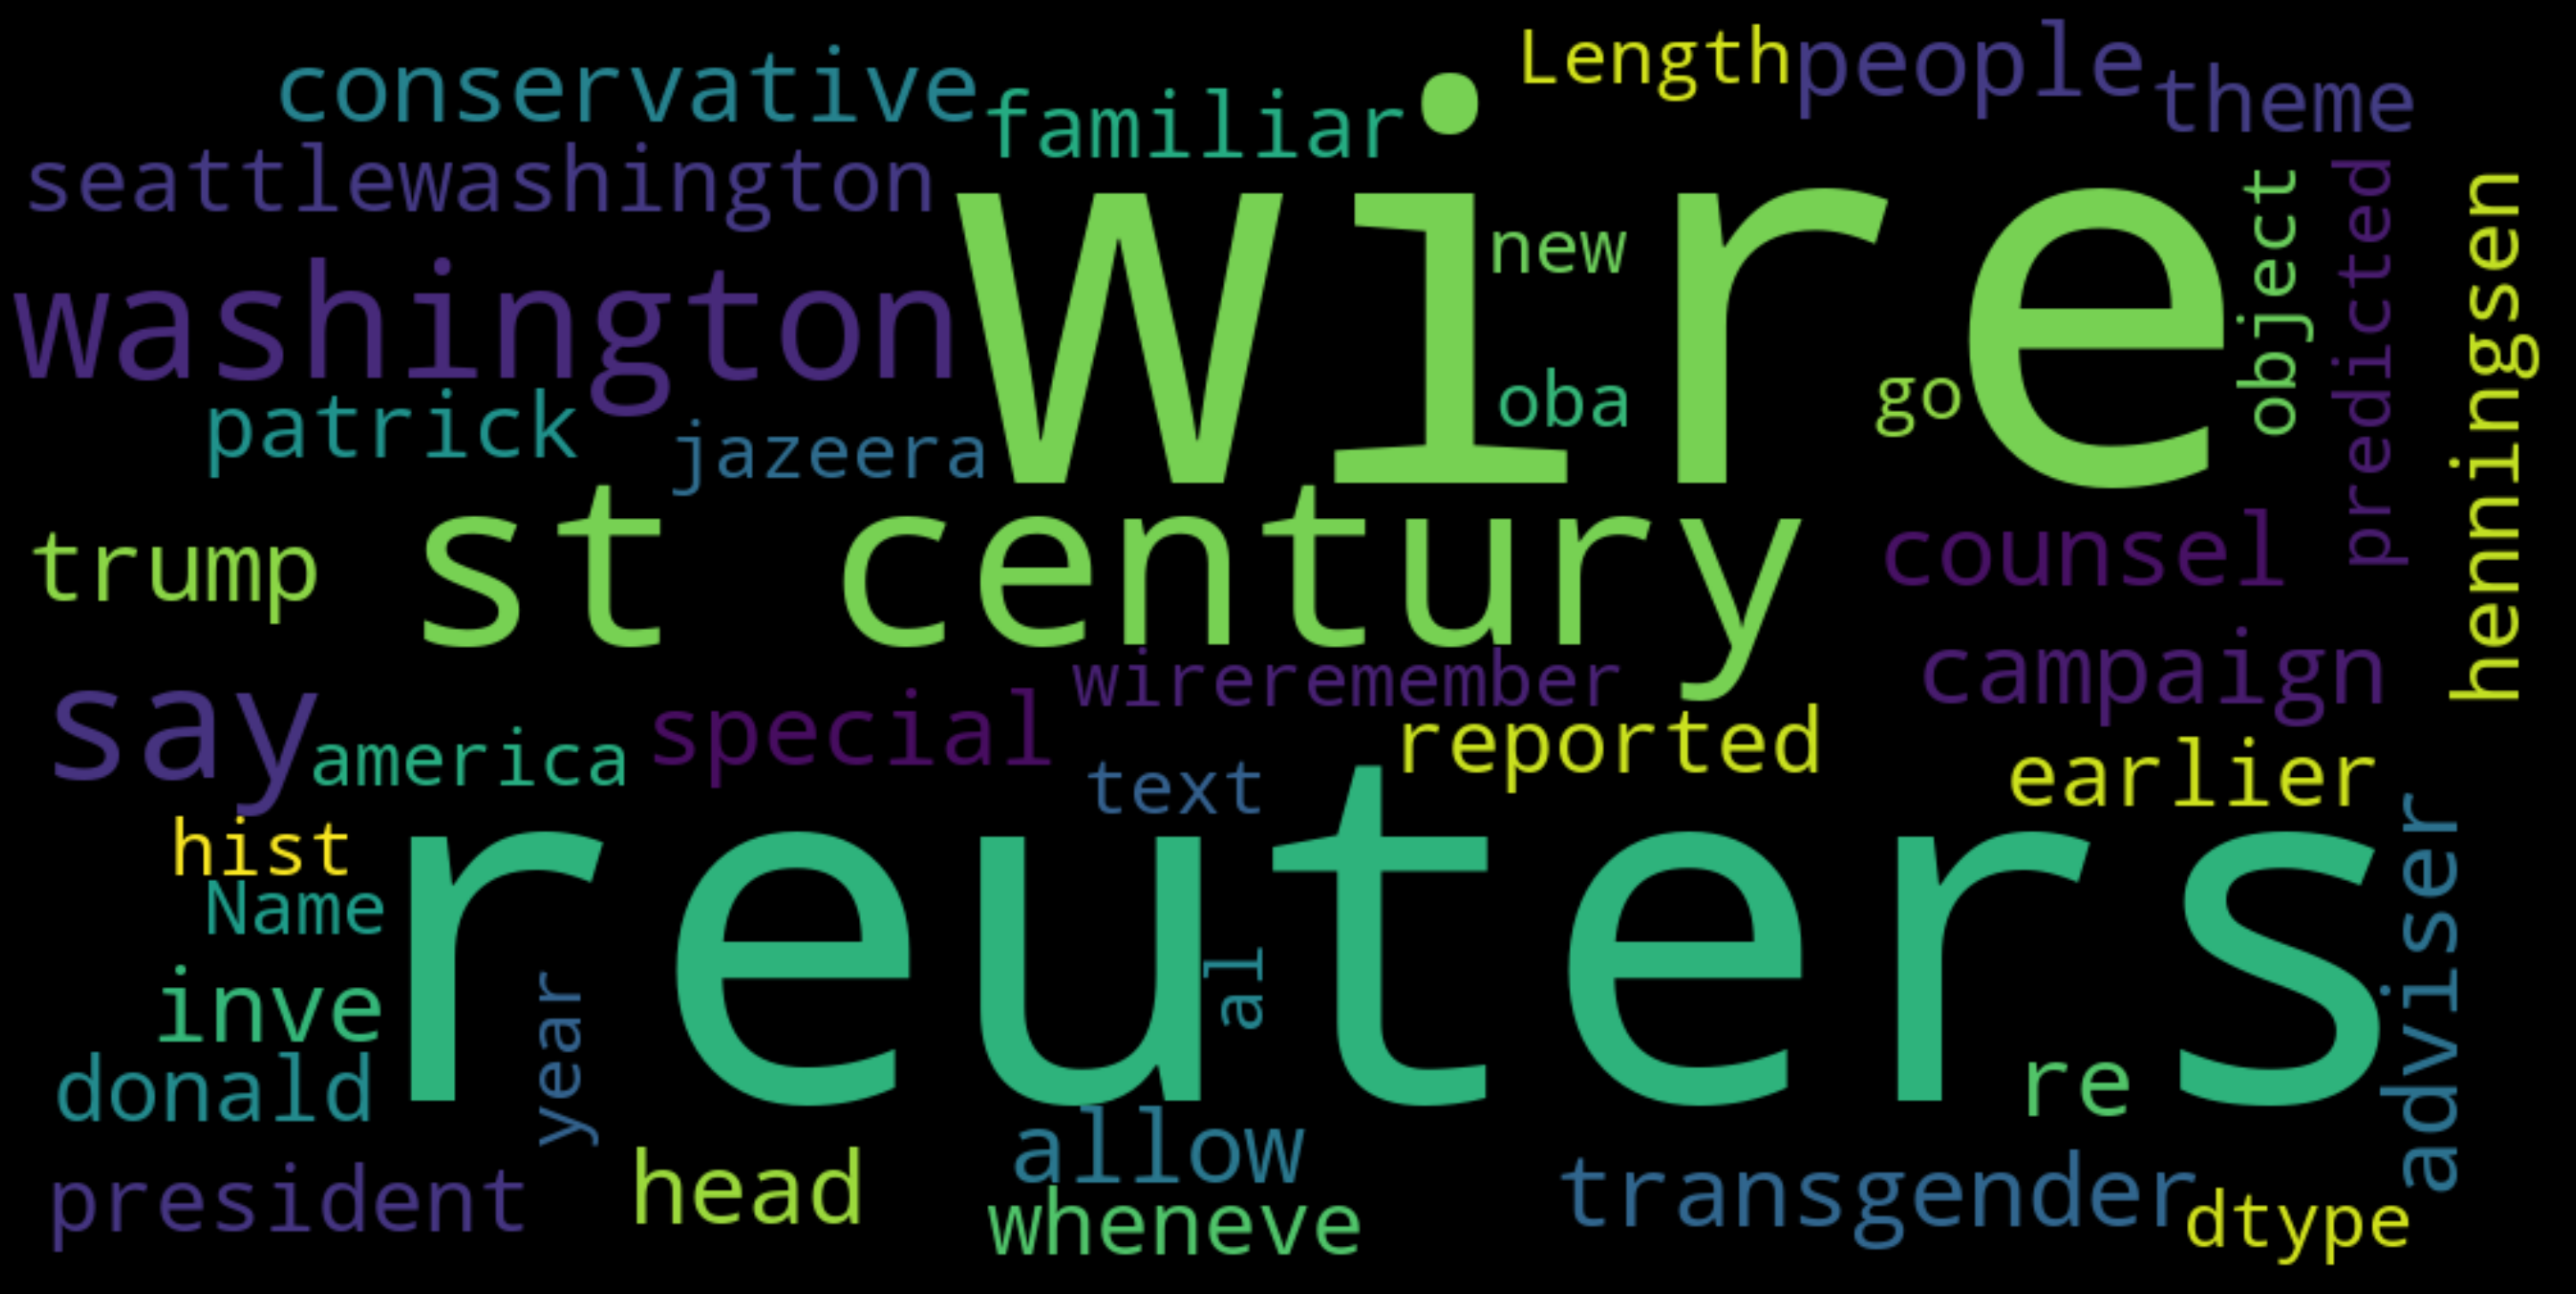

In [9]:
generate_word_cloud(df.text)

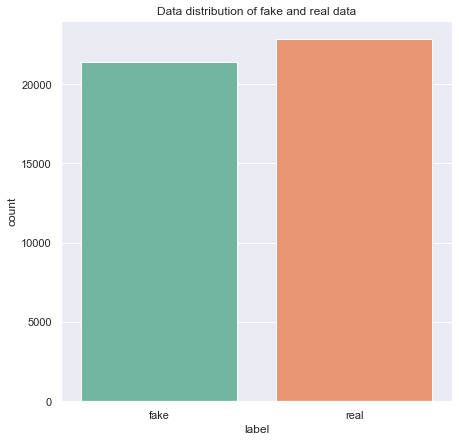

In [10]:
plt.figure(figsize=(7, 7))
sns.set(style="darkgrid")

color = sns.color_palette("Set2")
ax = sns.countplot(x="label", data=df, palette=color)

ax.set(xticklabels=['fake', 'real'])

plt.title("Data distribution of fake and real data")
plt.show()

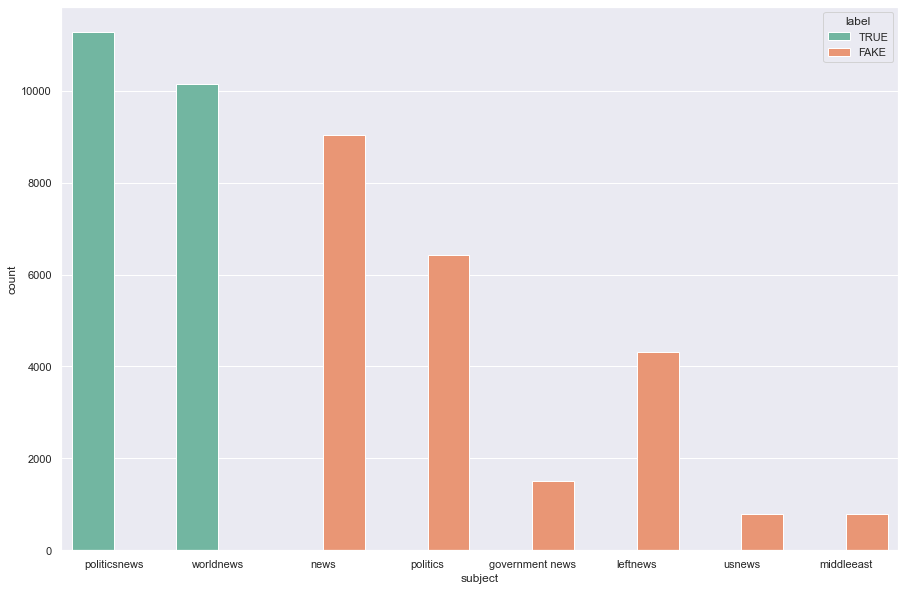

In [11]:
rcParams['figure.figsize'] = 15,10
sns.countplot(df['subject'], hue='label', data=df, palette="Set2")


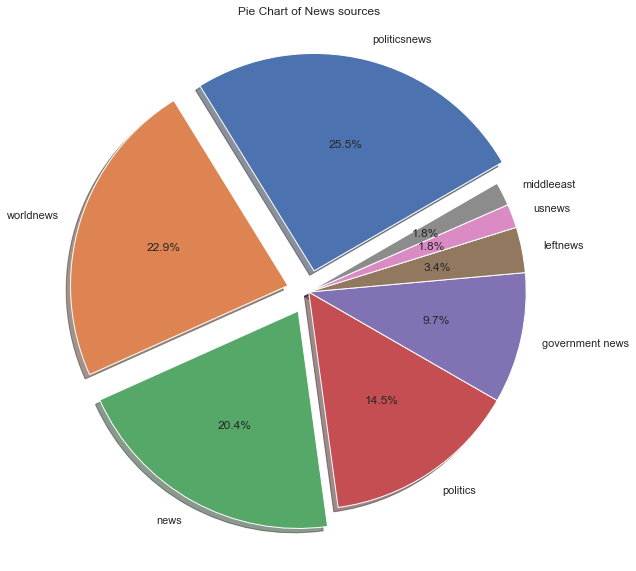

In [12]:
slices = df.subject.value_counts().to_list()
label = df.subject.unique()
explode = (0.1, 0.1, 0.1, 0,0,0,0,0) 
plt.pie(slices, labels = label, startangle = 30, shadow = True, explode=explode,autopct='%1.1f%%')
plt.title('Pie Chart of News sources')
plt.show()

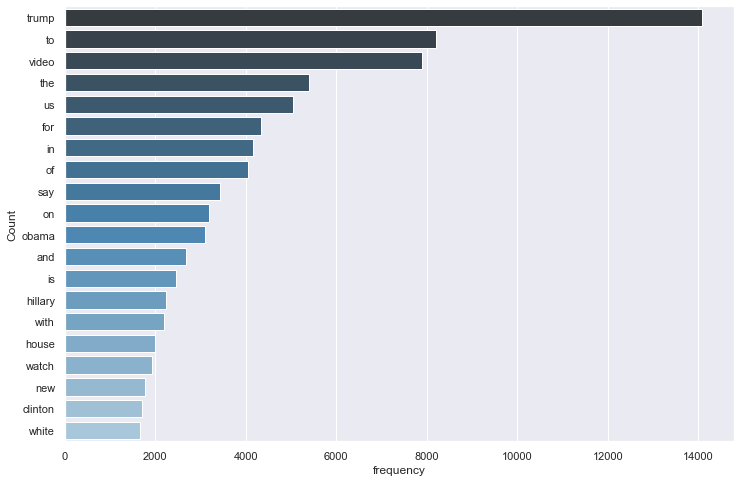

In [13]:
#top 20 unigrams
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['title'])
frequencies = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
word = word.nlargest(columns = "frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Blues_d"))
sns.set_context("poster")
ax.set(ylabel = "Count")
plt.show()

In [14]:
#top 20 bigrams
#word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#sparse_matrix = word_vectorizer.fit_transform(df['text'])
#frequencies = sum(sparse_matrix).toarray()[0]
#word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
#word = word.nlargest(columns = "frequency", n = 20)
#plt.figure(figsize=(12,8))
#ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Blues_d"))
#sns.set_context("poster")
#ax.set(ylabel = "Count")
#plt.show()

In [15]:
#top 20 trigrams
#word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
#sparse_matrix = word_vectorizer.fit_transform(df['text'])
#frequencies = sum(sparse_matrix).toarray()[0]
#word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
#word = word.nlargest(columns = "frequency", n = 20)
#plt.figure(figsize=(12,8))
#ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Blues_d"))
#sns.set_context("poster")
#ax.set(ylabel = "Count")
#plt.show()

In [16]:
df['allwords'] = df['title']+" "+df['text']+" "+df['subject']
df = df[['allwords','label']]
bow = CountVectorizer(analyzer = 'word').fit(df['allwords'])
vec = bow.transform(df['allwords'])

In [17]:
tfidf_transformer = TfidfTransformer().fit(vec)
df_tfidf = tfidf_transformer.transform(vec)

In [18]:
X = df_tfidf
y = df['label']

In [19]:
X_train, X_test, Y_train,Y_test= train_test_split(X, y, test_size=0.2,random_state=1234)

In [20]:
#Naive Bayes model
model_NB = MultinomialNB().fit(X_train, Y_train)
predictions_NB= model_NB.predict(X_test)

In [21]:
print (classification_report(Y_test, predictions_NB))

              precision    recall  f1-score   support

        FAKE       0.95      0.95      0.95      4537
        TRUE       0.95      0.95      0.95      4317

    accuracy                           0.95      8854
   macro avg       0.95      0.95      0.95      8854
weighted avg       0.95      0.95      0.95      8854



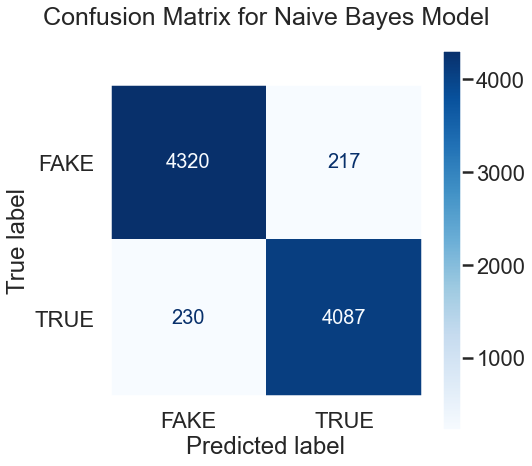

In [22]:
fig, ax = plt.subplots(figsize=(7,7))
label_font = {'size':'21'}  # Adjust to fit
plt.rcParams.update({'font.size': 20})
title_font = {'size':'25'}  # Adjust to fit
plot_confusion_matrix(model_NB, X_test, Y_test,cmap=plt.cm.Blues,ax=ax)
plt.grid(False)
plt.title('Confusion Matrix for Naive Bayes Model\n\n',fontdict=title_font)
plt.show()

In [23]:
#logistic Regression Model
model_LR = LogisticRegression().fit(X_train, Y_train)
predictions_LR = model_LR.predict(X_test)
print (classification_report(Y_test, predictions_LR))

              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4537
        TRUE       0.99      0.99      0.99      4317

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854



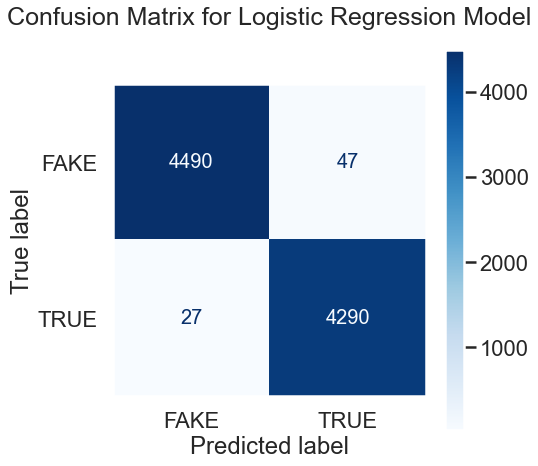

In [24]:
fig, ax = plt.subplots(figsize=(7,7))
label_font = {'size':'21'}  # Adjust to fit
plt.rcParams.update({'font.size': 20})
title_font = {'size':'25'}  # Adjust to fit
ax.set_title('Confusion Matrix for Logistic Regression Model\n\n', fontdict=title_font);
plot_confusion_matrix(model_LR, X_test, Y_test,cmap=plt.cm.Blues, ax=ax)
plt.grid(False)
plt.show()

In [25]:
#SVC model
model_SVC = SGDClassifier().fit(X_train, Y_train)
predictions_SVC = model_SVC.predict(X_test)
print (classification_report(Y_test, predictions_SVC))

              precision    recall  f1-score   support

        FAKE       1.00      0.99      1.00      4537
        TRUE       0.99      1.00      0.99      4317

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854



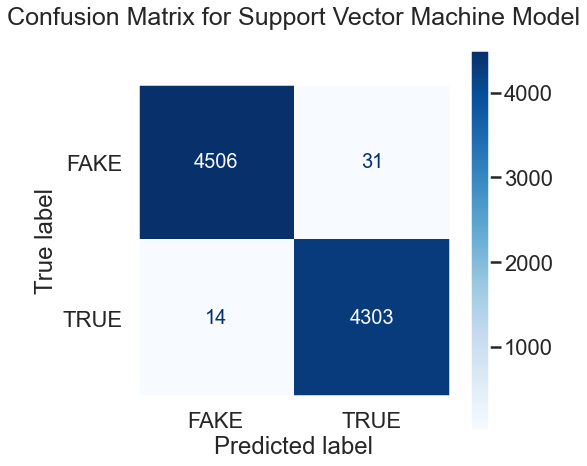

In [26]:
fig, ax = plt.subplots(figsize=(7,7))
label_font = {'size':'21'}  # Adjust to fit
plt.rcParams.update({'font.size': 20})
title_font = {'size':'25'}  # Adjust to fit
ax.set_title('Confusion Matrix for Support Vector Machine Model\n\n', fontdict=title_font);
plot_confusion_matrix(model_SVC, X_test, Y_test,cmap=plt.cm.Blues,ax=ax)
plt.grid(False)
plt.show()